In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Define Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define SGD Function
def delta_sgd(W, X, D, learning_rate):
    for k in range(len(X)): # Loop through all samples
        x = X[k].reshape(-1, 1) # Reshape input sample to a column vector
        d = D[k] # Desired output for sample k
        v = np.dot(W, x) # Weighted sum
        y = sigmoid(v) # Output after activation
        e = d - y # Error
        delta = e * y * (1 - y) # Gradient of error with respect to weights
        W += learning_rate * delta * x.T # Accumulate weights for all samples (all row vectors)
    return W

# Define the Batch Function for Batch Gradient Descent
def delta_batch(W, X, D, learning_rate):
    dWsum = np.zeros_like(W) # Initialize the gradient sum
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        v = np.dot(W, x)
        y = sigmoid(v)
        e = d - y
        delta = e * y * (1 - y)
        dWsum += learning_rate * delta * x.T
    dWavg = dWsum / len(X)   # Average the gradients
    W = W + dWavg            # Update weights using the averaged gradient
    return W

# Define Training Function
def run_training(W1, W2, X, D, epochs, lr):
    E1 = np.zeros(epochs)
    E2 = np.zeros(epochs)
    for epoch in range(epochs):
        W1 = delta_sgd(W1, X, D, lr)
        W2 = delta_batch(W2, X, D, lr)
        es1 = 0
        es2 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v1 = np.dot(W1, x)
            v2 = np.dot(W2, x)
            y1 = sigmoid(v1)
            y2 = sigmoid(v2)
            es1 += (d - y1) ** 2
            es2 += (d - y2) ** 2
        E1[epoch] = np.squeeze(es1) / len(X)
        E2[epoch] = np.squeeze(es2) / len(X)
    return E1, E2, W1, W2

2-1) Run the code using the code given in the next page without any change.

input(0,0), predicted output=1.0, desired output=0
input(0,1), predicted output=1.0, desired output=0
input(1,0), predicted output=1.0, desired output=0
input(1,1), predicted output=1.0, desired output=1


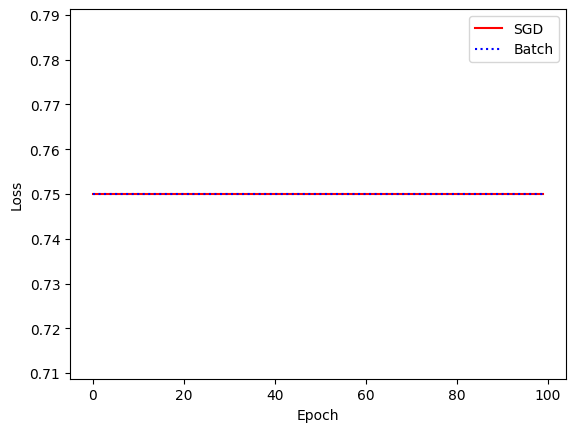

In [10]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[3332322.1, -323256.6, 772213.0]]
W2 = W1

# Parameters
epochs = 100
lr = 0.01 # learning rate

# Train data
E1, E2, W1_trained, W2_trained = run_training(W1, W2, X, D, epochs, lr)

# Inference
N = len(X)
for k in range(N):
    x = X[k].reshape(-1,1)
    v = np.dot(W1_trained,x) # Optimizer is SGD.
    y = sigmoid(v)
    print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
 
# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2-2) Using the code from 2-1, modify the initial weight as `W1 = [[0.68, 0.01, 0.73]]` and run the code.

input(0,0), predicted output=0.5859495731959541, desired output=0
input(0,1), predicted output=0.5641976264287257, desired output=0
input(1,0), predicted output=0.7182932133223229, desired output=0
input(1,1), predicted output=0.6999334244241662, desired output=1


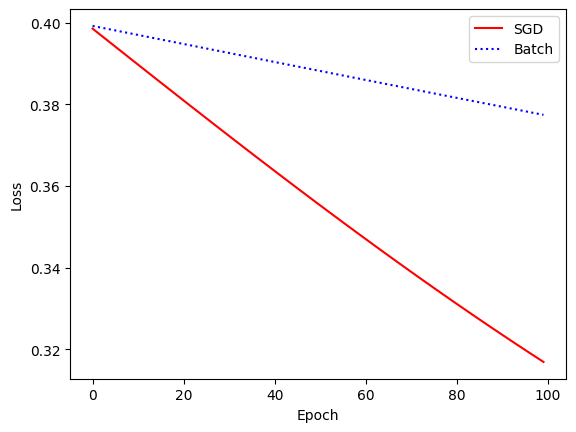

In [11]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 100
lr = 0.01 # learning rate

# Train data
E1, E2, W1_trained, W2_trained = run_training(W1, W2, X, D, epochs, lr)

# Inference
N = len(X)
for k in range(N):
    x = X[k].reshape(-1,1)
    v = np.dot(W1_trained,x) # Optimizer is SGD.
    y = sigmoid(v)
    print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
 
# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2-3) Using the code from 2-2, modify the learning rate to `lr = 0.9` and run the code. Then, modify the learning rate to `lr = 100` and run the code.

-----------------lr = 0.09-----------------
input(0,0), predicted output=0.020829578517260007, desired output=0
input(0,1), predicted output=0.20285630268480684, desired output=0
input(1,0), predicted output=0.20389394428823304, desired output=0
input(1,1), predicted output=0.7539260430488409, desired output=1
-----------------lr = 100-----------------
input(0,0), predicted output=9.442710248783476e-07, desired output=0
input(0,1), predicted output=1.171100244905025e-06, desired output=0
input(1,0), predicted output=2.2886046687843648e-06, desired output=0
input(1,1), predicted output=2.838363723947364e-06, desired output=1


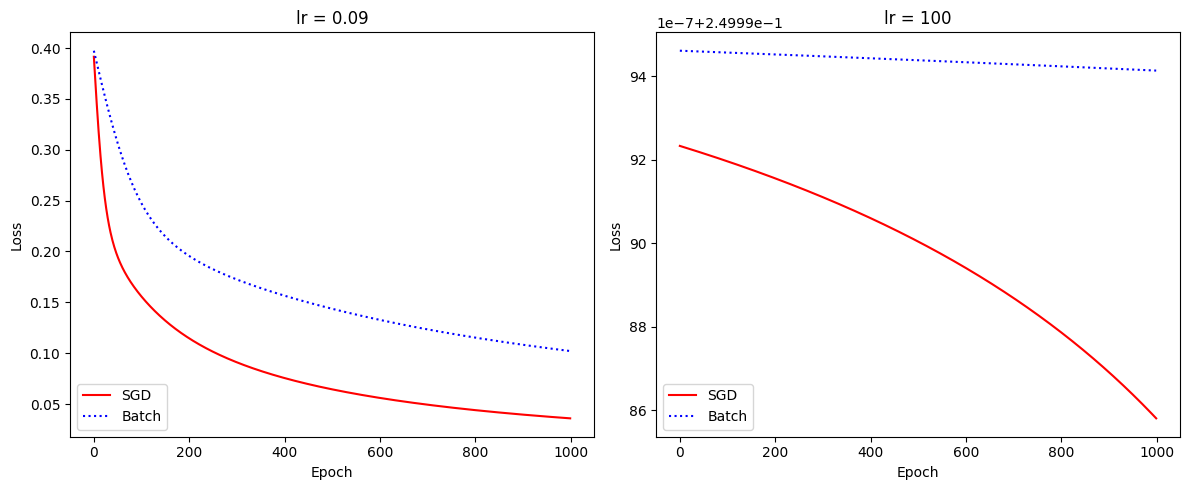

In [12]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Parameters
epochs = 1000
# Horizontal two plots for lr = 0.09 and lr = 100 respectively
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, lr_val in enumerate([0.09, 100]):
    # Reinitialize weights for each experiment to keep the same settings
    W1_init = [[0.68, 0.01, 0.73]]
    W2_init = W1_init
    E1, E2, W1_trained, W2_trained = run_training(W1_init, W2_init, X, D, epochs, lr_val)
    
    # Inference
    print(f"-----------------lr = {lr_val}-----------------")
    N = len(X)
    for k in range(N):
        x = X[k].reshape(-1,1)
        v = np.dot(W1_trained,x) # Optimizer is SGD.
        y = sigmoid(v)
        print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
        
    axes[i].plot(E1, 'r', label='SGD')
    axes[i].plot(E2, 'b:', label='Batch')
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')
    axes[i].legend(loc='lower left')
    axes[i].set_title(f"lr = {lr_val}")

plt.tight_layout()
plt.show()

2-4) (10 pts) Using the code from 2-3 (`lr=100`), modify the epochs to `epochs = 100000` and run the code.

input(0,0), predicted output=1.9296590958690417e-14, desired output=0
input(0,1), predicted output=0.0004205020075436615, desired output=0
input(1,0), predicted output=1.2192186162009744e-07, desired output=0
input(1,1), predicted output=0.9996239160001456, desired output=1


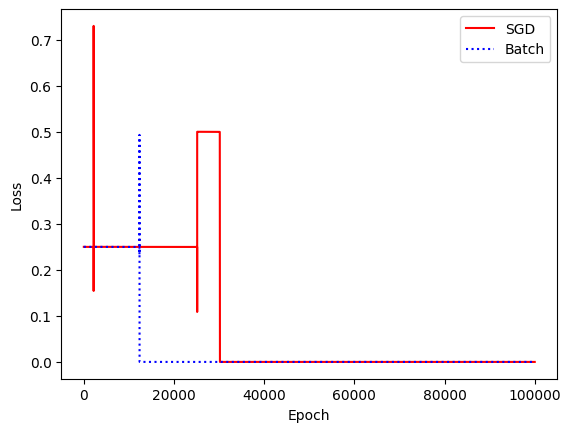

In [13]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 100000
lr = 100 # learning rate

# Train data
E1, E2, W1_trained, W2_trained = run_training(W1, W2, X, D, epochs, lr)

# Inference
N = len(X)
for k in range(N):
    x = X[k].reshape(-1,1)
    v = np.dot(W1_trained,x) # Optimizer is SGD.
    y = sigmoid(v)
    print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
 
# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2-5)  Run the code using the parameters below. Now let’s compare Batch (delta_batch) and SGD (delta_sgd) methods. Which one shows faster error convergence? (You can type and run a command `print(E1[-1],E2[-1])` to compare the final errors quantitatively.)

- `W1 = [[0.68 0.01 0.73]]`
- `lr = 0.9`
- `epochs=1000`

input(0,0), predicted output=0.00028582202096891256, desired output=0
input(0,1), predicted output=0.05844703939833359, desired output=0
input(1,0), predicted output=0.05864643215392242, desired output=0
input(1,1), predicted output=0.9311604874841752, desired output=1


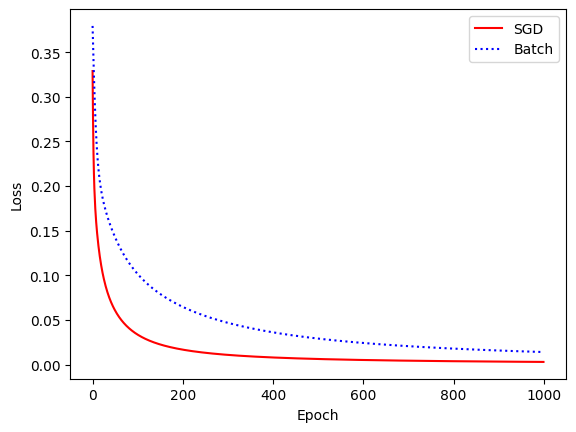

In [14]:
# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.9 # learning rate

# Train data
E1, E2, W1_trained, W2_trained = run_training(W1, W2, X, D, epochs, lr)

# Inference
N = len(X)
for k in range(N):
    x = X[k].reshape(-1,1)
    v = np.dot(W1_trained,x) # Optimizer is SGD.
    y = sigmoid(v)
    print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
 
# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

SGD exhibits faster error convergence; however, this is a trivial result. The reason is that the SGD delta update takes a step that is `len(D)` times larger than the batch delta update in one epoch. If we modify the weight update rule from `W = W + dWavg` to `W = W + dWsum`, the convergence behavior becomes similar between the two methods.

input(0,0), predicted output=0.00028582202096891256, desired output=0
input(0,1), predicted output=0.05844703939833359, desired output=0
input(1,0), predicted output=0.05864643215392242, desired output=0
input(1,1), predicted output=0.9311604874841752, desired output=1


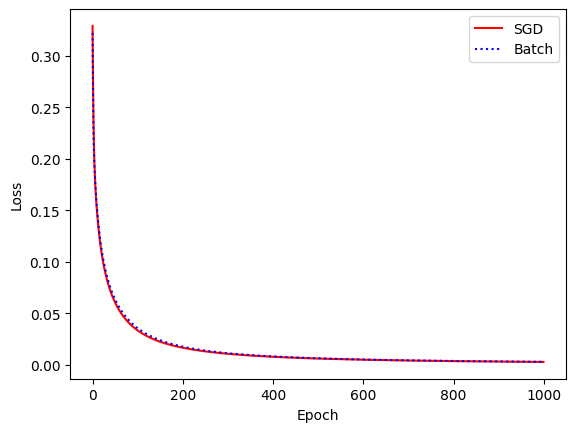

In [17]:
# Define the Batch Function for Batch Gradient Descent
def delta_batch_modified(W, X, D, learning_rate):
    dWsum = np.zeros_like(W) # Initialize the gradient sum
    for k in range(len(X)):
        x = X[k].reshape(-1, 1)
        d = D[k]
        v = np.dot(W, x)
        y = sigmoid(v)
        e = d - y
        delta = e * y * (1 - y)
        dWsum += learning_rate * delta * x.T
    dWavg = dWsum / len(X)   # Average the gradients
    W = W + dWsum            # Update weights using the averaged gradient
    return W

# Define Training Function
def run_training_modified(W1, W2, X, D, epochs, lr):
    E1 = np.zeros(epochs)
    E2 = np.zeros(epochs)
    for epoch in range(epochs):
        W1 = delta_sgd(W1, X, D, lr)
        W2 = delta_batch_modified(W2, X, D, lr)
        es1 = 0
        es2 = 0
        for k in range(len(X)):
            x = X[k].reshape(-1, 1)
            d = D[k]
            v1 = np.dot(W1, x)
            v2 = np.dot(W2, x)
            y1 = sigmoid(v1)
            y2 = sigmoid(v2)
            es1 += (d - y1) ** 2
            es2 += (d - y2) ** 2
        E1[epoch] = np.squeeze(es1) / len(X)
        E2[epoch] = np.squeeze(es2) / len(X)
    return E1, E2, W1, W2

# Data
X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
D = np.array([0, 0, 0, 1])

# Initial weights
W1 = [[0.68, 0.01, 0.73]]
W2 = W1

# Parameters
epochs = 1000
lr = 0.9 # learning rate

# Train data
E1, E2, W1_trained, W2_trained = run_training_modified(W1, W2, X, D, epochs, lr)

# Inference
N = len(X)
for k in range(N):
    x = X[k].reshape(-1,1)
    v = np.dot(W1_trained,x) # Optimizer is SGD.
    y = sigmoid(v)
    print(f'input({x[0].item()},{x[1].item()}), predicted output={y.item()}, desired output={D[k]}')
 
# Visualize
plt.plot(E1, 'r', label='SGD')
plt.plot(E2, 'b:', label='Batch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()